# Create susceptibility charts

In this notebook we showcase how we can compute the multipactor thresholds measured during several tests and represent it on a susceptibility chart.

## Load data

In [1]:
from functools import partial

from multipac_testbench import AveragedThresholdSet, TestCampaign, ThresholdSet
from multipac_testbench.data import config_path
from multipac_testbench.data.multipactor_tests import tests
from multipac_testbench.instruments import CurrentProbe, FieldProbe, ForwardPower
from multipac_testbench.util.multipactor_detectors import quantity_is_above_threshold

freqs = (120.0, 120.0, 120.0, 120.0, 120.0, 140.0, 140.0, 140.0, 140.0, 160.0, 160.0, 160.0, 160.0)
swrs = (5.0, 4.0, 3.0, 2.0, 1.0, 4.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 4.0)

test_campaign =  TestCampaign.from_filepaths(
    tests,
    freqs,
    swrs,
    config_path,
    is_raw=True
)

[INFO    ] [loader.py           ] Applied trigger_policy = 'keep_all' on /home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/data/multipactor_tests/2025.06.20_120MHz-SWR5-6.csv
[WARNING ] [physics.py          ] 1 points were removed in R calculation, where reflected power was higher than forward power.
[INFO    ] [loader.py           ] Applied trigger_policy = 'keep_all' on /home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/data/multipactor_tests/2025.06.20_120MHz-SWR4-7.csv
[WARNING ] [physics.py          ] 3 points were removed in R calculation, where reflected power was higher than forward power.
[INFO    ] [loader.py           ] Applied trigger_policy = 'keep_all' on /home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/data/multipactor_tests/2025.06.20_120MHz-SWR3-8.csv
[WARNING ] [physics.py          ] 4 points were removed in R calculation, where reflected power was higher than forward

/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/util/physics.py:28: RuntimeWarning: invalid value encountered in sqrt
  reflection_coefficient = np.abs(np.sqrt(reflected_power / forward_power))
/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/util/physics.py:28: RuntimeWarning: invalid value encountered in sqrt
  reflection_coefficient = np.abs(np.sqrt(reflected_power / forward_power))
/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/util/physics.py:28: RuntimeWarning: invalid value encountered in sqrt
  reflection_coefficient = np.abs(np.sqrt(reflected_power / forward_power))
/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/util/physics.py:28: RuntimeWarning: invalid value encountered in sqrt
  reflection_coefficient = np.abs(np.sqrt(reflected_power / forward_power))
/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbe

## Determine thresholds

In [2]:
current_multipactor_criterions = {'threshold': 12., 'minimum_number_of_points': 1}
current_multipac_detector = partial(quantity_is_above_threshold, **current_multipactor_criterions)

thresholds = test_campaign.determine_thresholds(
    current_multipac_detector,
    CurrentProbe,
    predicate=lambda t: t.sample_index > 300,
)

merged = test_campaign.determine_thresholds(
    current_multipac_detector,
    CurrentProbe,
    predicate=lambda t: t.sample_index > 300,
    threshold_reducer="any",
)
averaged = {test: AveragedThresholdSet.from_threshold_set(threshold_set) for test, threshold_set in merged.items()}


[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold_set.py    ] Multiple instruments detected at the same position 0.611:
- NI9205_MP4l
- NI9205_MP8l
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold_set.py    ] Multiple instruments detected at the same position 0.611:
- NI9205_MP4l
- NI9205_MP8l
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold_set.py    ] Multiple instruments detected at the same position 0.611:
- NI9205_MP4l
- NI9205_MP8l
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the en

## Represent susceptibility plot

[WARNING ] [plot.py             ] Dropped 1 rows with NaN in $SWR$ column.


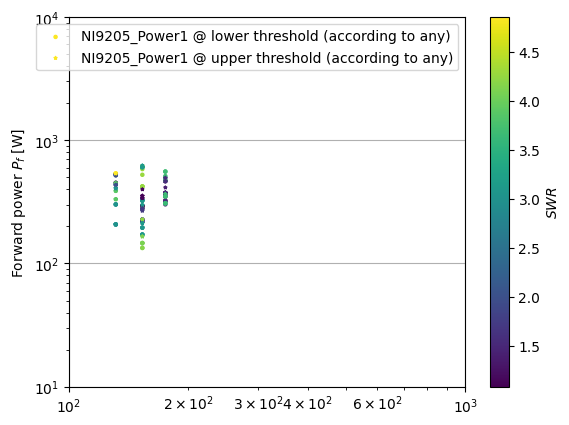

In [3]:
_ = test_campaign.susceptibility_chart(merged, ForwardPower, figsize=(8, 8), xlim=(1e2, 1e3), ylim=(1e1, 1e4))

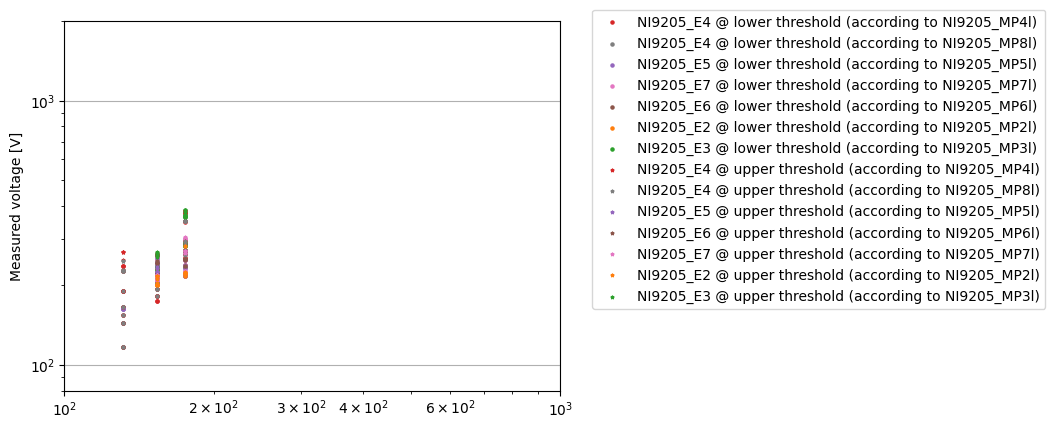

In [4]:
axes, df = test_campaign.susceptibility_chart(thresholds, FieldProbe, figsize=(8, 8), xlim=(1e2, 1e3), ylim=(8e1, 2e3), color_according_to_swr=False)
axes.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))